In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle


from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge


In [8]:
# from dataset_download import dataset_download

# dataset_download("natezhang123/social-anxiety-dataset")

# EDA

In [9]:
data = pd.read_csv("dataset/enhanced_anxiety_dataset.csv")
data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [11]:
from EDA_utils import get_columns_type

num_cols, cat_cols = get_columns_type(data)

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Therapy Sessions (per month)', 'Diet Quality (1-10)', 'Anxiety Level (1-10)']
Categorical Columns: ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']


## Deleting Duplicate Records

In [12]:
from EDA_utils import delete_duplicated_data

delete_duplicated_data(data)

Duplicate Records (before): 0
Duplicate Records (after): 0


## Deleting Null Data

In [13]:
print(data.isna().sum())
original_rows = len(data)
data = data.dropna()
rows_removed = original_rows - len(data)
print("\n-------------------")
print(f"{rows_removed} rows with null values ​​were removed.")

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

-------------------
0 rows with null values ​​were removed.


## Univariate Analysis

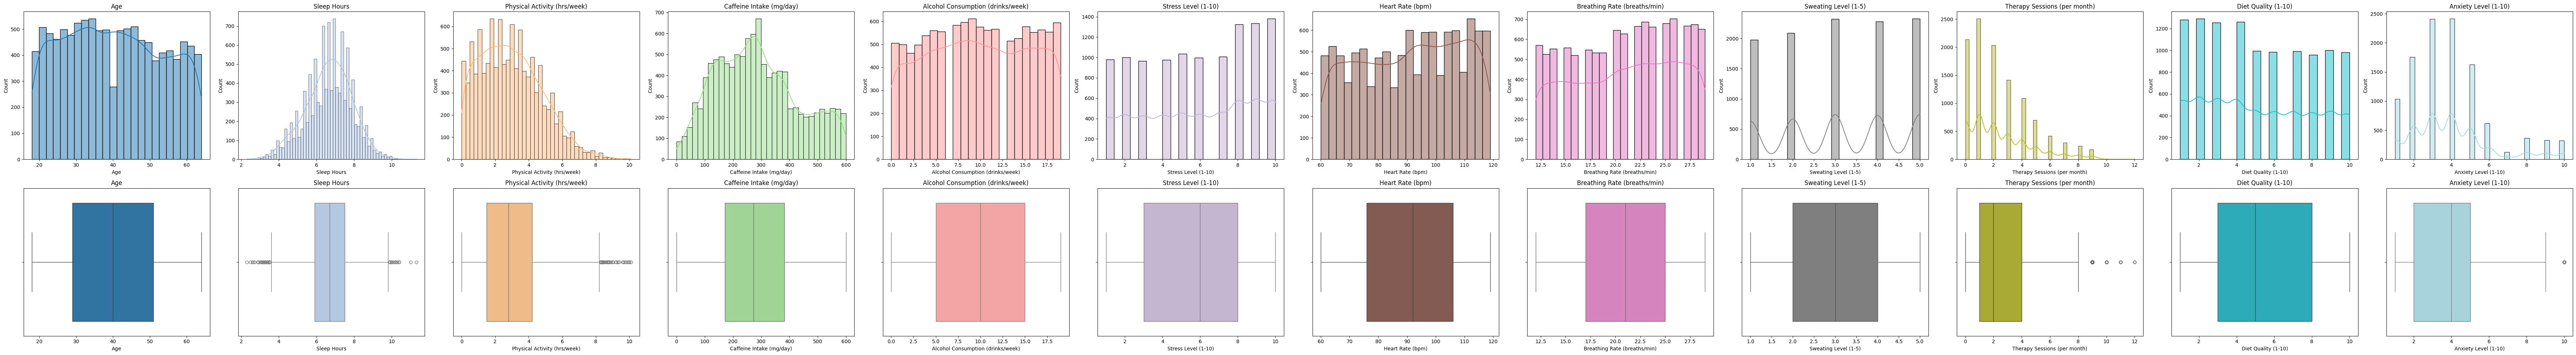

In [14]:
from EDA_utils import plot_numeric_distributions

plot_numeric_distributions(data, num_cols)

<small>

- **🧑 Age:** The distribution exhibits a multimodal tendency. The density curve shows notable concentrations around ages 30–35 and 41–46. Age values are broadly distributed, ranging approximately from 18 to 65 years.

- **💤 Sleep Hours:** Approximately normal distribution.The density curve peaks around 7 hours of sleep. Sleep durations range from roughly 2 to 10 hours, with the highest density between 5 and 7 hours. Several outliers appear below the lower whisker (2 to 3.5 hours) and above the upper whisker (10 to 11 hours).


- **🏃 Physical Activity (hours/week):** A peak is observed around 2 hours of weekly physical activity with a positively skewed distribution. Values range from 0 to 10 hours per week, with most observations concentrated between 0 and 5 hours.         


- **☕ Caffeine Intake (mg/day):** The density curve suggests a bimodal asimetric distribution with notable peaks around 275 and 500 mg/day, indicating distinct consumption patterns. Intake ranges broadly from near 0 to 600 mg/day.

- **🍷 Alcohol Consumption (drinks/week):** The density curve indicates a relatively uniform distribution with a slight central tendency around 8-10 drinks per week. The shape is somewhat irregular Consumption ranges from 0 to approximately 20 drinks per week.

- **😥 Stress Level (1-10):** The density curve shows a multimodal distribution with peak stress levels around 2, 5 and 8-10. Stress levels are reported across the entire scale from 1 to 10.

- **❤️ Heart Rate (bpm):** The distribution appears relatively uniform with no clear central peak, although mild increases in density occur around 90–95 and 110–115 bpm. The data spans a range from approximately 60 to 120 bpm.

- **💨 Breathing Rate (breaths/min):** The density curve suggests a relatively uniform with a slight upward trend towards higher breathing rates (araound 22-25). Breathing rates are distributed between approximately 12 and 30 breaths per minute.

- **💧 Sweating Level (1-5):** The density curve indicates a multimodal distribution with distinct peaks at each level. Sweating levels are reported across the discrete scale of 1 to 5, with relatively high frequencies at each level.

- **🛋️ Therapy Sessions (per month):** The density curve shows a distribution heavily skewed towards zero, with a primary peak at 1 and a rapidly decreasing frequency as the number of sessions per month increases. The number of therapy sessions ranges from 0 to 12 per month.

- **🍎 Diet Quality (1-10):** The density curve suggests a multimodal distribution with peaks at integer values, particularly around 2 and 5. The shape is non-normal. Diet quality is rated across the scale of 1 to 10, with notable frequencies at various integer points.

- **😟 Anxiety Level (1-10):** The density curve suggests a multimodal distribution with prominent peaks at integer values, particularly around 3 and 4. The shape is non-normal. Anxiety levels are reported across the discrete scale of 1 to 10. There are also smaller peaks at lower and higher levels.

</small>

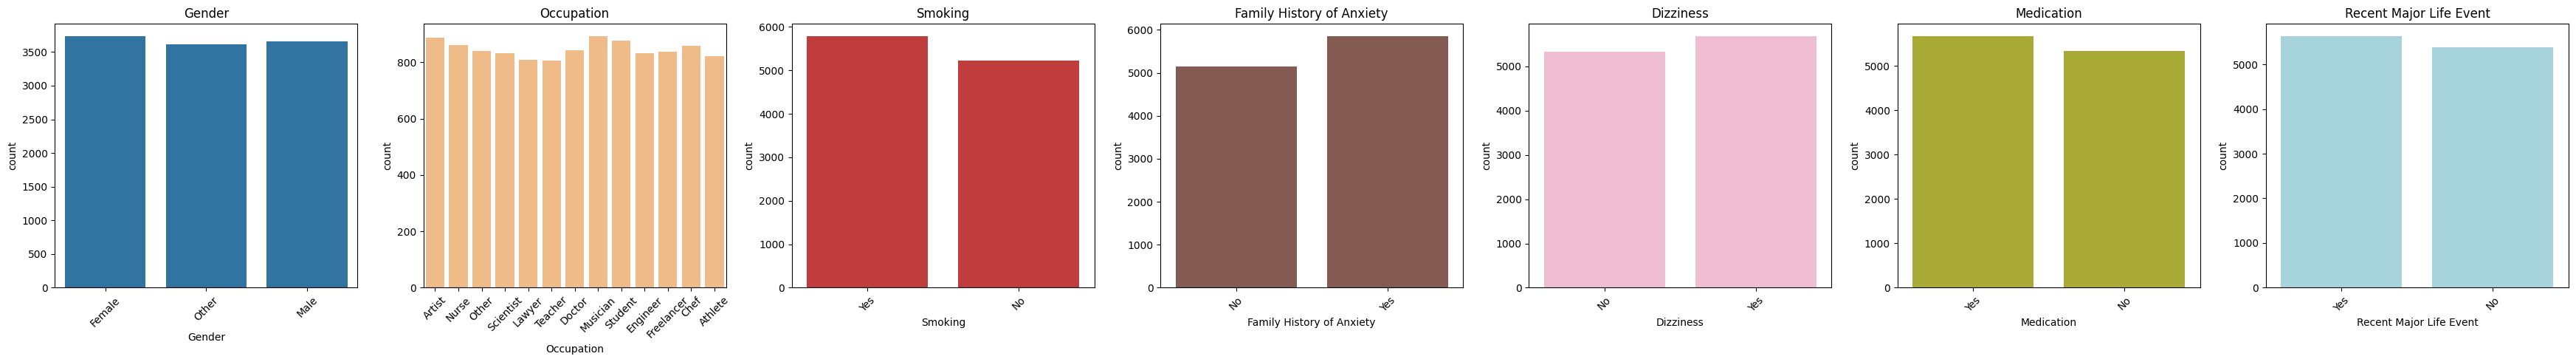

In [15]:
from EDA_utils import plot_categorical_distributions

plot_categorical_distributions(data, cat_cols)

<small>

- **🚻 Gender:** The distribution across categories is fairly even. 'Female' shows a slightly higher count (~3750), followed closely by 'Male' (~3650), with 'Other' (~3600) also representing a substantial portion. The representation across gender identities is relatively balanced in this dataset.

- **💼 Occupation:** The distribution across various occupations appears relatively uniform. The counts for each listed occupation, such as Artist, Nurse, Other, etc., are broadly similar, ranging between approximately 800 and 900 individuals. There isn't a single dominant occupation within this dataset.

- **🚬 Smoking:** The distribution shows a higher prevalence of individuals who 'Yes' indicate they smoke (~5800) compared to those who indicate 'No' (~5200). There is a slightly difference in the counts between smokers and non-smokers in this dataset.

- **👨‍👩‍👧‍👦 Family History of Anxiety:** The distribution indicates a slightly higher count of individuals who report a 'Yes' for family history of anxiety (~5850) compared to those who report 'No' (~5150). A family history of anxiety appears to be slightly more common in this dataset.+

- **😵‍💫 Dizziness:** The distribution between those reporting 'No' (~5300) and 'Yes' (~5700) to experiencing dizziness is relatively balanced, with a slightly higher number indicating they have experienced dizziness.

- **💊 Medication:** The distribution shows a slightly higher number of individuals reporting 'Yes' to taking medication (~5700) compared to those reporting 'No' (~5300). Medication usage appears to be slightly more prevalent in this dataset.

- **📌 Recent Major Life Event:** The distribution between individuals who answered 'Yes' (~5600) and 'No' (~5400) to experiencing a recent major life event is fairly balanced, with a slightly higher count for those who did experience one.

</small>

📝 The multivariate analysis is omitted, as the Decision Tree Regressor (see below ⬇️) shows that none of these features have a meaningful impact on predicting the dependent variable, "Anxiety_Level_scaled".
Including them would not significantly improve the model’s performance.

# Feature Engineering

In [16]:
data.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


## Variable Conversion

> The Anxiety_Level_Scaled variable is generated by dividing each anxiety score by the maximum observed value, rescaling the target to a 0–1 range. This percentage-based format ensures that the predicted values are interpretable and bounded, while also helping regression models perform more consistently by reducing sensitivity to scale differences.

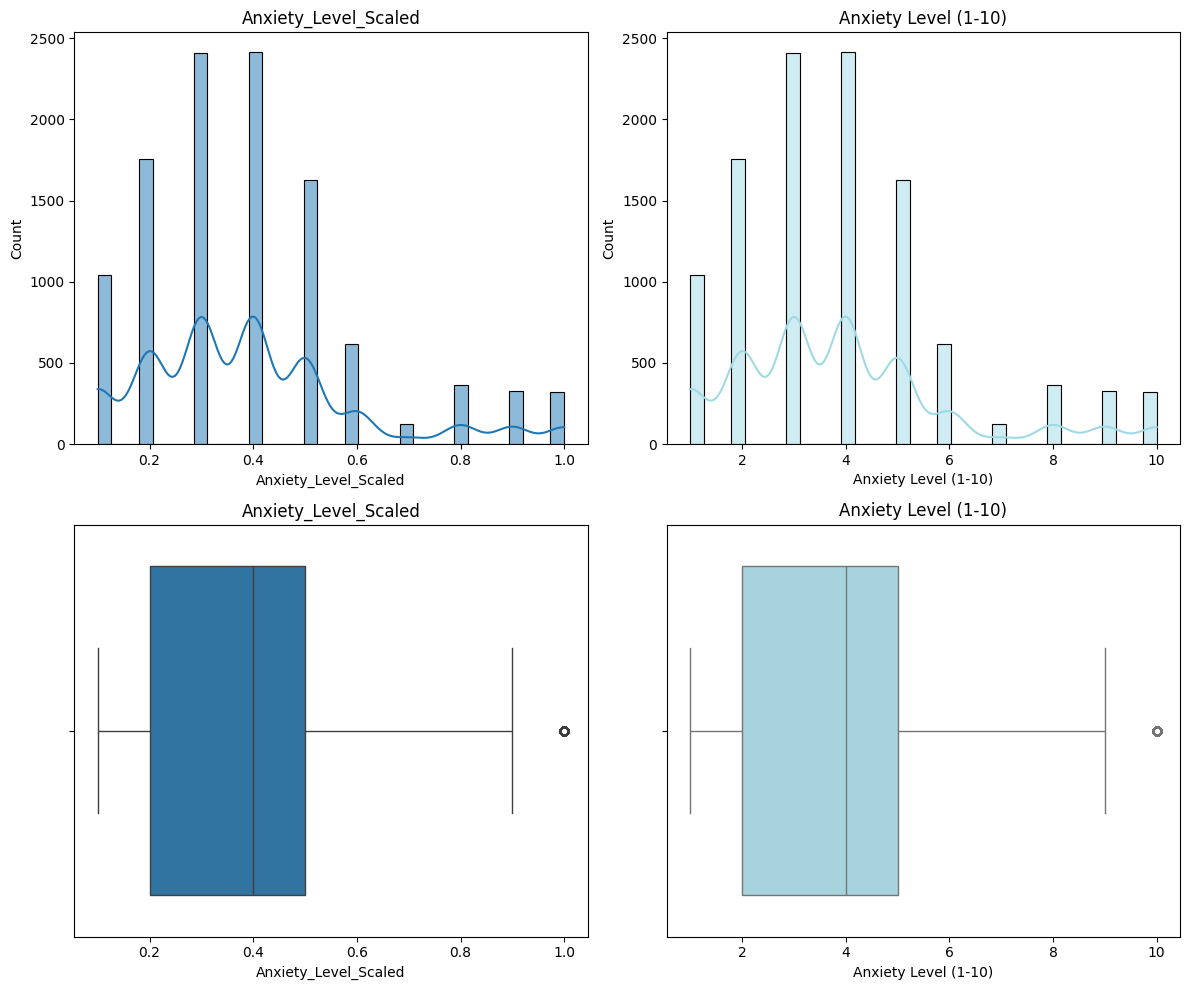

In [17]:
data["Anxiety_Level_Scaled"] = (
    data["Anxiety Level (1-10)"] / data["Anxiety Level (1-10)"].max()
)

plot_numeric_distributions(data, ["Anxiety_Level_Scaled", "Anxiety Level (1-10)"])

In [18]:
# Drop the original anxiety score column after scaling, keeping only the normalized target variable
data = data.drop(columns=["Anxiety Level (1-10)"])

In [19]:
# We use drop_first=True to avoid multicollinearity by dropping the first category
# of each categorical variable when creating dummy variables.
data = pd.get_dummies(data, columns=cat_cols, drop_first=True, dtype=int)
data.head(3)

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),...,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher,Smoking_Yes,Family History of Anxiety_Yes,Dizziness_Yes,Medication_Yes,Recent Major Life Event_Yes
0,29,6.0,2.7,181,10,10,114,14,4,3,...,0,0,0,0,0,1,0,0,1,1
1,46,6.2,5.7,200,8,1,62,23,2,2,...,1,0,0,0,0,1,1,1,0,0
2,64,5.0,3.7,117,4,1,91,28,3,1,...,0,1,0,0,0,0,1,0,0,1


## Variable Selection

In [20]:
X = data.drop(columns="Anxiety_Level_Scaled")
y = data["Anxiety_Level_Scaled"]

### Filter by Collinearity

<Axes: >

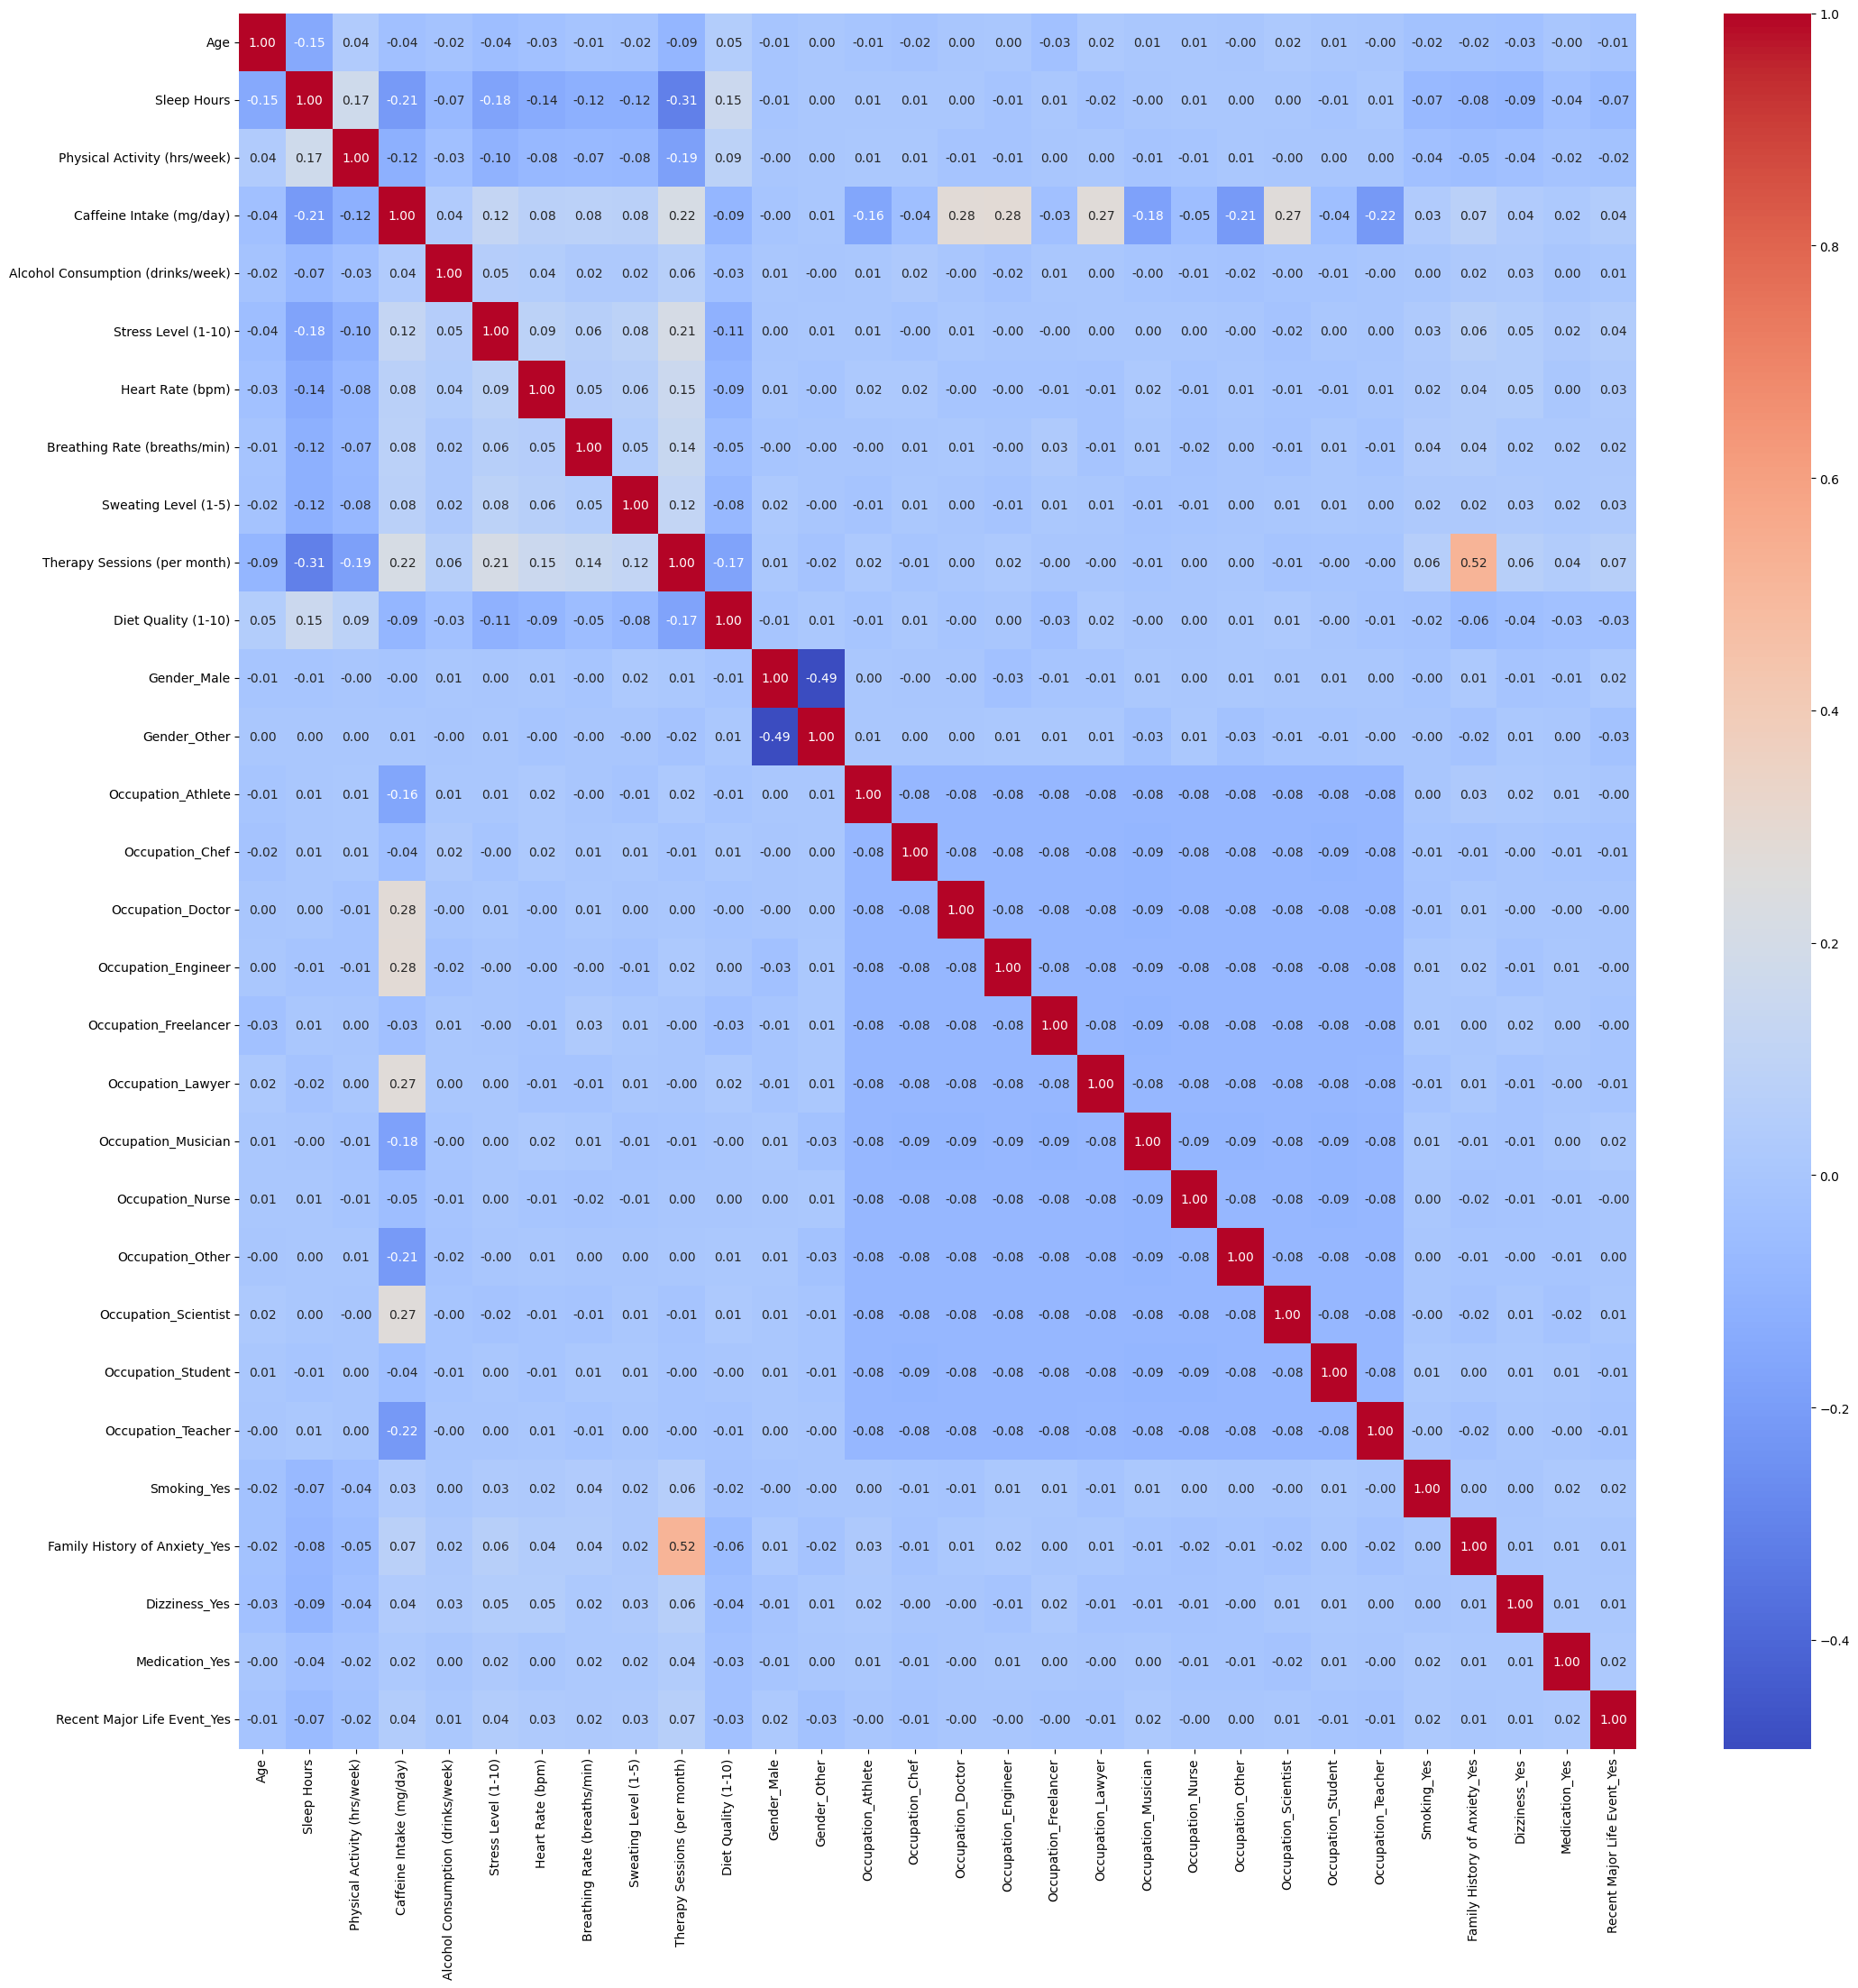

In [21]:
plt.figure(figsize=(25, 25))
correlacion = X.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")

> Based on the correlation heatmap analysis, the independent variables do not exhibit high correlations with each other. This indicates low collinearity, which is beneficial for the stability of the regression model.

In [22]:
upper_tri = correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
data_cleaned = data.drop(columns=to_drop)
print("Columns Eliminated for High Collinearity:", to_drop)

Columns Eliminated for High Collinearity: []


### Filter by Decision Tree Regressor

> A DecisionTreeRegressor is used to determine the most important features for predicting the target variable. Feature importance scores are obtained using the .feature_importances_ attribute, which quantifies the contribution of each feature to the model based on the reduction of prediction error.

In [23]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X, y)

DecisionTreeRegressor(random_state=42)

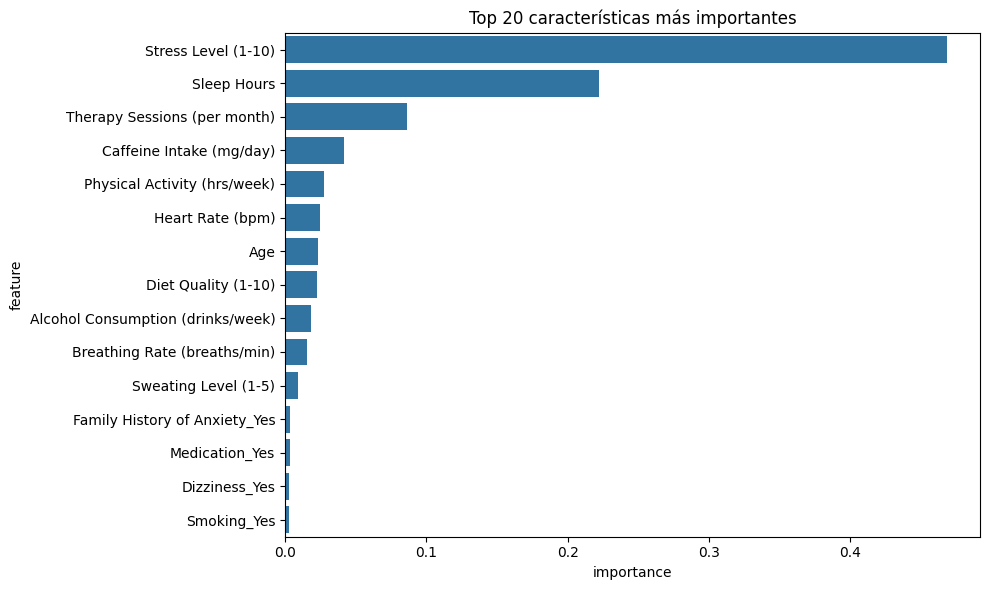

In [24]:
importances = dtr.feature_importances_
features = X.columns

importance_df = pd.DataFrame({"feature": features, "importance": importances})

importance_df = importance_df.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=importance_df.head(15))
plt.title("Top 20 características más importantes")
plt.tight_layout()
plt.show()

### Filter by Variance 0

> No columns with zero variance were found, so it was not necessary to delete any. This indicates that all variables contain relevant information and vary across observations.

In [25]:
deleted = data_cleaned.columns[data_cleaned.nunique() == 1].tolist()
print("Columns eliminated by zero variance:", deleted)
df_cleaned = data_cleaned.loc[:, data_cleaned.nunique() > 1]

Columns eliminated by zero variance: []


> The top five predictor variables ranked by the decision tree based on importance are selected; these correspond to numerical features.

In [26]:
selected_features = importance_df["feature"].head(5).values
selected_features.tolist()

['Stress Level (1-10)',
 'Sleep Hours',
 'Therapy Sessions (per month)',
 'Caffeine Intake (mg/day)',
 'Physical Activity (hrs/week)']

In [27]:
X = data[selected_features]
y = data["Anxiety_Level_Scaled"]

# Models to be applied

Linear: 
* Linnear Regression (OLS)
* Lasso Regularization
* Ridge Regularization
* SVR - Linnear

Non-linnear
*   KNN
* SVR - Poly, RBF 

In [28]:
from EDA_utils import model_evaluation

results_train = {}
results_test = {}

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8250, 5), (8250,), (2750, 5), (2750,))

In [30]:
from sklearn.preprocessing import StandardScaler

scaler_type = "Standard"
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linnear Regression (OLS)

In [31]:
ols_model = LinearRegression().fit(X_train, y_train)
coef_ols = np.concatenate(([ols_model.intercept_], ols_model.coef_))
print("OLS Coefficients:\n", coef_ols)

OLS Coefficients:
 [ 3.61160099e-01  3.89916845e-02 -4.59035061e-02  2.64673098e-02
  2.36036989e-04 -7.93732611e-03]


### Evaluation

In [32]:
y_pred_train_ols, metrics_train_ols = model_evaluation(
    ols_model, X_train, y_train, "Linear Regression - Train"
)

y_pred_test_ols, metrics_test_ols = model_evaluation(
    ols_model, X_test, y_test, "Linear Regression - Test"
)

results_train["OLS"] = metrics_train_ols
results_test["OLS"] = metrics_test_ols


Linear Regression - Train:
-------------
RMSE = 0.1154
R2 = 0.7015
MAE = 0.0921
MAPE = 32.4894

Linear Regression - Test:
-------------
RMSE = 0.1139
R2 = 0.7199
MAE = 0.0906
MAPE = 31.8141


## Lasso regularization

In [33]:
def desnormalize(scaler_type, scaler, theta):
    bias = (
        theta[0] - np.sum(theta[1:] * (scaler.mean_ / scaler.scale_))
        if scaler_type == "Standard"
        else theta[0] + np.sum(theta[1:] * scaler.min_)
    )
    coef = (
        theta[1:] / scaler.scale_
        if scaler_type == "Standard"
        else theta[1:] * scaler.scale_
    )
    return np.r_[bias, coef]

In [34]:
Lasso_model = Lasso(alpha=1e3, random_state=42).fit(X_train_scaled, y_train)
coef_lasso = np.concatenate(([Lasso_model.intercept_], Lasso_model.coef_))
coef_lasso_orig = desnormalize(scaler_type, scaler, coef_lasso)
print("Coef Lasso:", coef_lasso)
print("Coef Lasso (original scale):", coef_lasso_orig)

Coef Lasso: [ 0.39152727  0.         -0.          0.          0.         -0.        ]
Coef Lasso (original scale): [ 0.39152727  0.         -0.          0.          0.         -0.        ]


### Evaluation

In [35]:
y_pred_train_las, metrics_train_las = model_evaluation(
    Lasso_model, X_train_scaled, y_train, "Lasso - Train"
)
y_pred_test_las, metrics_test_las = model_evaluation(Lasso_model, X_test_scaled, y_test, "Lasso - Test")

results_train["Lasso"] = metrics_train_las
results_test["Lasso"] = metrics_test_las


Lasso - Train:
-------------
RMSE = 0.2112
R2 = 0.0000
MAE = 0.1567
MAPE = 60.8861

Lasso - Test:
-------------
RMSE = 0.2153
R2 = -0.0007
MAE = 0.1605
MAPE = 60.4288


## Ridge Regularization

In [36]:
Ridge_model = Ridge(alpha=0.5e3, random_state=42).fit(X_train_scaled, y_train)
coef_ridge = np.concatenate(([Ridge_model.intercept_], Ridge_model.coef_))
coef_ridge_orig = desnormalize(scaler_type, scaler, coef_ridge)
print("Coef Ridge:", coef_ridge)
print("Coef (original scale):", coef_ridge_orig)

Coef Ridge: [ 0.39152727  0.10824249 -0.05421119  0.05615902  0.0334376  -0.01483351]
Coef (original scale): [ 3.66868031e-01  3.69777939e-02 -4.44476444e-02  2.57745033e-02
  2.31169018e-04 -8.13406605e-03]


### Evaluation

In [37]:
y_pred_train_rid, metrics_train_rid = model_evaluation(
    Ridge_model, X_train_scaled, y_train, "Linear Regression - Train"
)
y_pred_test_rid, metrics_test_rid = model_evaluation(
    Ridge_model, X_test_scaled, y_test, "Linear Regression - Test"
)

results_train["Ridge"] = metrics_train_rid
results_test["Ridge"] = metrics_test_rid


Linear Regression - Train:
-------------
RMSE = 0.1156
R2 = 0.7004
MAE = 0.0922
MAPE = 32.8060

Linear Regression - Test:
-------------
RMSE = 0.1142
R2 = 0.7185
MAE = 0.0907
MAPE = 32.0132


In [38]:
y_pred_test_las = model_evaluation(Lasso_model, X_test_scaled, y_test, "Lasso - Test")


Lasso - Test:
-------------
RMSE = 0.2153
R2 = -0.0007
MAE = 0.1605
MAPE = 60.4288


## SVR

In [33]:
C = [0.1, 1, 10, 100, 1000]
K = ["linear", "poly", "rbf"]

f = make_subplots(rows=2, cols=3, subplot_titles=[f"{k} (unscaled)" for k in K] + [f"{k} (scaled)" for k in K])

for i, k in enumerate(K, 1):
    r = [
        (
            (m := SVR(kernel=k, C=c).fit(X_train, y_train)).score(X_train, y_train),
            m.score(X_test, y_test),
        )
        for c in C
    ]
    f.add_trace(go.Scatter(x=C, y=[t for t, _ in r], mode="lines", name=f"Train ({k}, unscaled)"), row=1, col=i)
    f.add_trace(go.Scatter(x=C, y=[u for _, u in r], mode="lines", name=f"Test ({k}, unscaled)"), row=1, col=i)

for i, k in enumerate(K, 1):
    r = [
        (
            (m := SVR(kernel=k, C=c).fit(X_train_scaled, y_train)).score(X_train_scaled, y_train),
            m.score(X_test_scaled, y_test),
        )
        for c in C
    ]
    f.add_trace(go.Scatter(x=C, y=[t for t, _ in r], mode="lines", name=f"Train ({k}, scaled)"), row=2, col=i)
    f.add_trace(go.Scatter(x=C, y=[u for _, u in r], mode="lines", name=f"Test ({k}, scaled)"), row=2, col=i)

f.update_xaxes(type="log", title_text="C", row=2, col=1)
f.update_yaxes(title_text="R2", row=1, col=1)
f.update_yaxes(title_text="R2", row=2, col=1)
f.update_layout(height=700, width=1200, title_text="SVR Performance vs C for Different Kernels")
f.show()


### Evaluation Kernel - RBF (Unscaled)

In [ ]:
svr_model = SVR(C=1000, kernel="rbf")
svr_model.fit(X_train, y_train)

SVR(C=1000)

In [40]:
y_pred_train_svr, metrics_train_svr = model_evaluation(svr_model, X_train, y_train, "SVR - Train")
y_pred_test_svr, metrics_test_svr = model_evaluation(svr_model, X_test, y_test, "SVR - Test")

results_train["SVR"] = metrics_train_svr
results_test["SVR"] = metrics_test_svr


SVR - Train:
-------------
RMSE = 0.1087
R2 = 0.7352
MAE = 0.0870
MAPE = 31.4098

SVR - Test:
-------------
RMSE = 0.1075
R2 = 0.7503
MAE = 0.0857
MAPE = 30.8757


### Evaluation Kernel - RBF (Standar Scaled)

In [41]:
svr_model_scaled = SVR(C=1, kernel="rbf")
svr_model_scaled.fit(X_train_scaled, y_train)

SVR(C=1)

In [42]:
y_pred_train_svr_scaled, metrics_train_svr_scaled = model_evaluation(
    svr_model_scaled, X_train_scaled, y_train, "SVR scaled - Train"
)
y_pred_test_svr_scaled, metrics_test_svr_scaled = model_evaluation(
    svr_model_scaled, X_test_scaled, y_test, "SVR scaled - Test"
)

results_train["SVR_scaled"] = metrics_train_svr_scaled
results_test["SVR_scaled"] = metrics_test_svr_scaled


SVR scaled - Train:
-------------
RMSE = 0.1002
R2 = 0.7749
MAE = 0.0809
MAPE = 30.3455

SVR scaled - Test:
-------------
RMSE = 0.1021
R2 = 0.7747
MAE = 0.0819
MAPE = 30.5675


## KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor


ks = range(1, 50)
scores_unscaled = [
    (
        m := KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train),
        m.score(X_train, y_train),
        m.score(X_test, y_test),
    )
    for k in ks
]


scores_scaled = [
    (
        m := KNeighborsRegressor(n_neighbors=k).fit(X_train_scaled, y_train),
        m.score(X_train_scaled, y_train),
        m.score(X_test_scaled, y_test),
    )
    for k in ks
]

fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=("Unscaled", "Scaled")
)

fig.add_trace(
    go.Scatter(
        x=list(ks),
        y=[t for _, t, _ in scores_unscaled],
        mode="lines",
        name="Train (unscaled)",
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=list(ks),
        y=[u for _, _, u in scores_unscaled],
        mode="lines",
        name="Test (unscaled)",
    ),
    row=1,
    col=1,
)


fig.add_trace(
    go.Scatter(
        x=list(ks),
        y=[t for _, t, _ in scores_scaled],
        mode="lines",
        name="Train (scaled)",
    ),
    row=2,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=list(ks),
        y=[u for _, _, u in scores_scaled],
        mode="lines",
        name="Test (scaled)",
    ),
    row=2,
    col=1,
)

fig.update_layout(
    height=670,
    title_text="KNN Regressor Accuracy vs k",
    xaxis2_title="k",
    yaxis1_title="Accuracy",
    yaxis2_title="Accuracy",
)

fig.show()

In [44]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [45]:
KNN_model = KNeighborsRegressor(n_neighbors=20, p=1)
KNN_model.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=20, p=1)

In [46]:
y_pred_train_knn, metrics_train_knn = model_evaluation(KNN_model, X_train_scaled, y_train, "SVR scaled - Train")
y_pred_test_knn, metrics_test_knn = model_evaluation(KNN_model, X_test_scaled, y_test, "SVR scaled - Test")

results_train["KNN"] = metrics_train_knn
results_test["KNN"] = metrics_test_knn


SVR scaled - Train:
-------------
RMSE = 0.0994
R2 = 0.7785
MAE = 0.0797
MAPE = 30.0419

SVR scaled - Test:
-------------
RMSE = 0.1023
R2 = 0.7741
MAE = 0.0825
MAPE = 30.8981


In [47]:
import plotly.graph_objects as go

min_val = min(y_train.min(), y_pred_train_ols.min())
max_val = max(y_train.max(), y_pred_train_ols.max())

fig = go.Figure(
    data=[
        go.Scatter(
            x=y_train,
            y=y_pred_train_ols,
            mode="markers",
            name="OLS",
            marker=dict(color='blue', opacity=0.6)
        ),
        go.Scatter(
            x=y_train,
            y=y_pred_train_las,
            mode="markers",
            name="Lasso",
            marker=dict(color="red", opacity=0.6),
        ),
        go.Scatter(
            x=y_train,
            y=y_pred_train_rid,
            mode="markers",
            name="Ridge",
            marker=dict(color="green", opacity=0.6),
        ),
        go.Scatter(
            x=y_train,
            y=y_pred_train_svr_scaled,
            mode="markers",
            name="SVR (scaled)",
            marker=dict(color="cyan", opacity=0.6),
        ),
        go.Scatter(
            x=y_train,
            y=y_pred_train_knn,
            mode="markers",
            name="KNN",
            marker=dict(color="gold", opacity=0.6),
        ),
        go.Scatter(
            x=[min_val, max_val],
            y=[min_val, max_val],
            mode="lines",
            name="Ideal",
            line=dict(color="black", dash="dash"),
        ),
    ]
)

fig.update_yaxes(range=[min_val, max_val])
fig.update_xaxes(range=[min_val, max_val])

fig.update_layout(
    title="Rendimiento: Training",
    xaxis_title="Expenses (Real Data)",
    yaxis_title="Expenses (Predicted)",
    height=600,
    template="plotly_white",
)

fig.show()


In [64]:
from IPython.display import display, HTML

df_train = pd.DataFrame(results_train).T
df_test = pd.DataFrame(results_test).T

df_train_rounded = df_train.round(4)
df_test_rounded = df_test.round(4)

html = f"""
<div style="display: flex; gap: 20px;">
    <div>
        <h3>Results Train</h3>
        {df_train_rounded.to_html()}
    </div>
    <div>
        <h3>Results Test</h3>
        {df_test_rounded.to_html()}
    </div>
</div>
"""

display(HTML(html))

,RMSE,R2,MAE,MAPE
OLS,0.1154,0.7015,0.0921,32.4894
Lasso,0.2112,0.0000,0.1567,60.8861
Ridge,0.1156,0.7004,0.0922,32.8060
SVR,0.1087,0.7352,0.0870,31.4098
SVR_scaled,0.1002,0.7749,0.0809,30.3455
KNN,0.0994,0.7785,0.0797,30.0419
,RMSE,R2,MAE,MAPE
OLS,0.1139,0.7199,0.0906,31.8141
Lasso,0.2153,-0.0007,0.1605,60.4288
Ridge,0.1142,0.7185,0.0907,32.0132


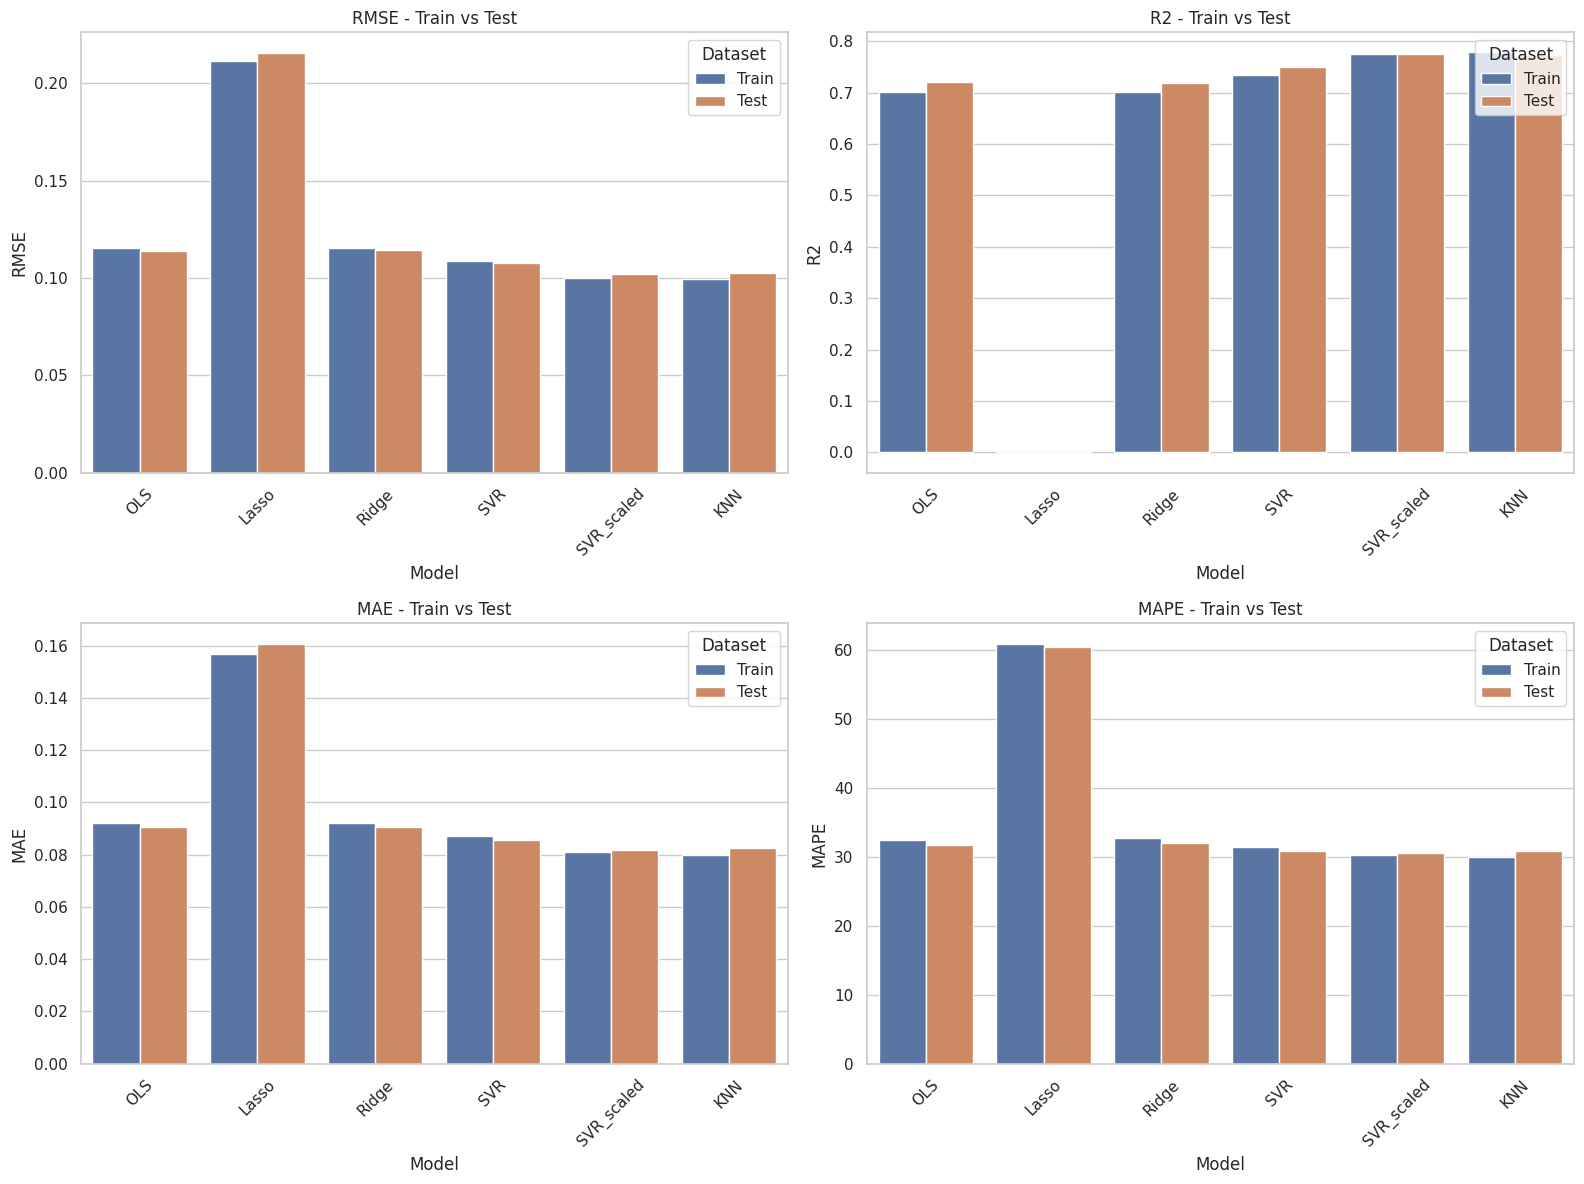

In [77]:
metrics = ['RMSE', 'R2', 'MAE', 'MAPE']
n_metrics = len(metrics)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    df_metric = pd.DataFrame({
        'Model': df_train.index.tolist() * 2,
        'Dataset': ['Train'] * len(df_train) + ['Test'] * len(df_test),
        'Value': pd.concat([df_train[metric], df_test[metric]])
    })

    sns.barplot(data=df_metric, x='Model', y='Value', hue='Dataset', ax=axes[i])
    axes[i].set_title(f'{metric} - Train vs Test')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [49]:
model_name = "ols_anxiety_model"
with open(f'{model_name}.pkl', 'wb') as f:
     pickle.dump(ols_model, f)
print(f"Modelo guardado en {model_name}.pkl")

Modelo guardado en ols_anxiety_model.pkl
